# 5 Домашние задание по ТВиМС

### Импорт библиотек

In [1]:
from itertools import combinations

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

### Найстроки графиков

In [2]:
sns.set(style="whitegrid")

## №1 Данные и гипотезы

Возьмем данные, которые были использованы в предыдущем задании из датасета [**kion**](https://github.com/irsafilo/KION_DATASET).

In [3]:
users_df = pd.read_csv('data/users.csv')
items_df = pd.read_csv('data/items.csv')
interactions_df = pd.read_csv('data/interactions.csv')

Сформируем двухвыборочные гипотезы касательно медиан и распределений для дискретного и непрерывного случая.

### Гипотезы для дискретного случая
* Медиана зарплаты для мужчин и для женщин одинакова.
* Распределение зарплаты пользователей для мужчин и женщин одинаковы.

Зарплата в этих данных представлена как категориальный признак пользователя

In [4]:
users_df['income'].unique()

array(['income_60_90', 'income_20_40', 'income_40_60', 'income_0_20', nan,
       'income_90_150', 'income_150_inf'], dtype=object)

In [5]:
incomes = users_df[users_df['income'].notna() & users_df['sex'].notna()]
incomes = incomes[['income', 'sex']]

incomes['income'].replace(['income_60_90', 
                           'income_20_40',
                           'income_40_60',
                           'income_0_20',
                           'income_90_150',
                           'income_150_inf'], 
                          ['60_90', 
                           '20_40',
                           '40_60',
                           '0_20',
                           '90_150',
                           '150_inf'],
                           inplace=True)

incomes.sample(3)

,income,sex
517774,20_40,Ж
407279,20_40,М
820253,40_60,Ж


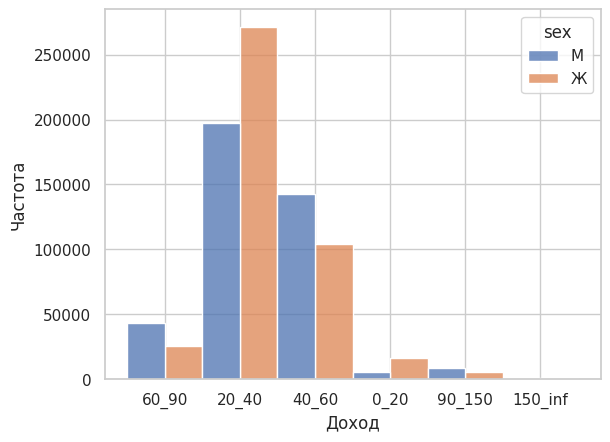

In [6]:
sns.histplot(data=incomes, 
             x='income',
             hue='sex',
             multiple="dodge")
plt.xlabel('Доход')
plt.ylabel('Частота')
plt.show()

### Гипотзеы для непрерывного случая
* Медиана количества просмотренных фиьмов для мужчин и для женщин одинакова.
* Распределение количества просмотров пользователей для мужчин и женщин одинаковы

In [7]:
views = interactions_df.groupby('user_id')\
                       .count()['item_id']\
                       .reset_index()\
                       .rename(columns={'item_id':'views'})

views = views.join(users_df[['user_id', 'sex']]\
             .set_index('user_id'))\
             .dropna()[['views', 'sex']]

views.sample(3)

,views,sex
690835,10,М
112868,3,М
752099,6,Ж


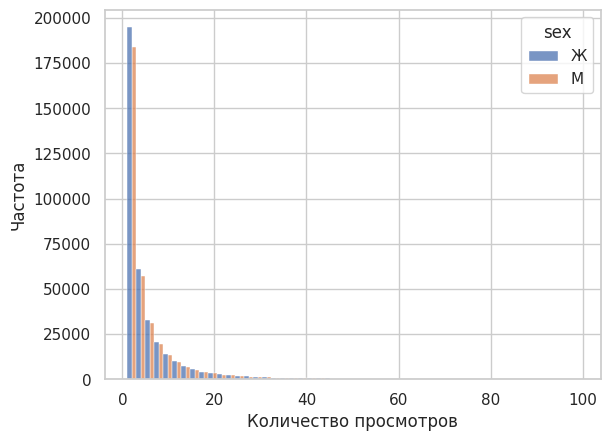

In [8]:
sns.histplot(data=views.query('views < 100'),
             bins=50,
             x='views',
             hue='sex',
             multiple="dodge")
plt.xlabel('Количество просмотров')
plt.ylabel('Частота')
plt.show()

Прологарифмируем количество просмотов для каждого пользователя.

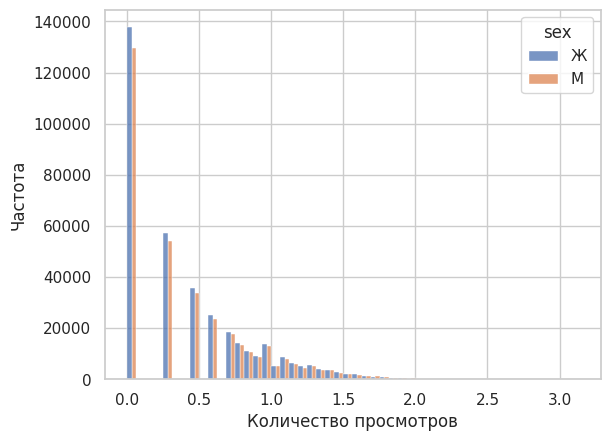

In [9]:
log_views = views.copy()
log_views['views'] = np.log10(log_views['views'])

sns.histplot(data=log_views.query('views < 100'),
             bins=50,
             x='views',
             hue='sex',
             multiple="dodge")
plt.xlabel('Количество просмотров')
plt.ylabel('Частота')
plt.show()

## №2 Проверка гипотез статистическими тестами

### Дискретный случай

### Непрерывный случай

## №3 Проверка гипотез бутстрапом тестами

## №4 Итог